In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('detection_tests/px4_logs/odometry_data_5.csv', header=None)
# Assign column names based on the provided nametags
data.columns = ['timestamp', 'u1', 'u2', 'f1', 'f2', 'f3', 'p_s', 'q_s', 'r_s', 
                'n_x', 'n_y', 'n_z', 'roll_rad', 'pitch_rad', 'yaw_rad', 'x', 'y', 'z']

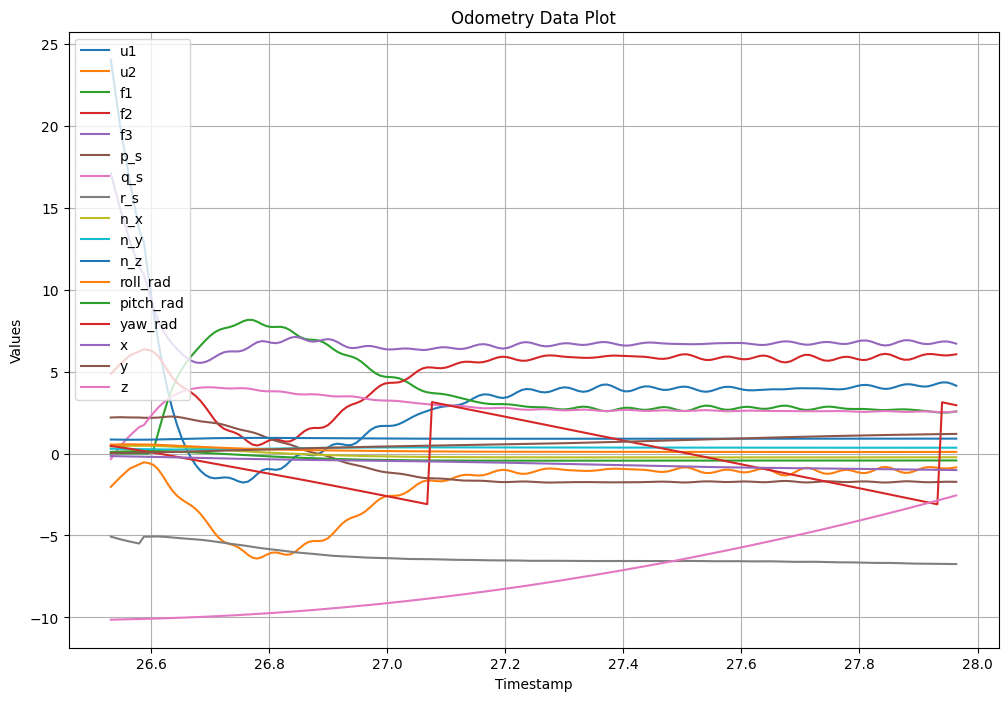

In [5]:

# Plotting
plt.figure(figsize=(12, 8))

# Plot each variable against timestamp
for column in data.columns[1:]:  # Skip the first column (timestamp)
    plt.plot(data['timestamp']/1e6, data[column], label=column)

plt.title('Odometry Data Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [6]:
# Plotting with Plotly
import plotly.express as px

# Create individual plots for each variable
for column in data.columns[1:]:  # Skip the first column (timestamp)
    fig = px.line(data, x='timestamp', y=column, 
                  labels={'value': 'Values', 'variable': column},
                  title=f'Odometry Data for {column}')
    fig.show()